# Mean Reversion Strategy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import bt
import talib

In [3]:
stock_data = pd.read_csv("../../assets/GOOG.csv", index_col='Date', parse_dates=True)

In [4]:
price_data = stock_data[['Close']]

## Calculate RSI

In [35]:
stock_rsi = talib.RSI(price_data['Close'], timeperiod=14)

In [36]:
stock_rsi.head()

Date
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
2016-01-04   NaN
2016-01-05   NaN
dtype: float64

## Create the signal

In [28]:
signal = pd.Series(0, index=stock_rsi.index, name='Close')

In [29]:
signal[stock_rsi > 70] = -1
signal[stock_rsi < 30] = 1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

signal = signal.to_frame()

In [37]:
signal.head()

,Close
Date,
2015-12-29,0
2015-12-30,0
2015-12-31,0
2016-01-04,0
2016-01-05,0


## Merge the data

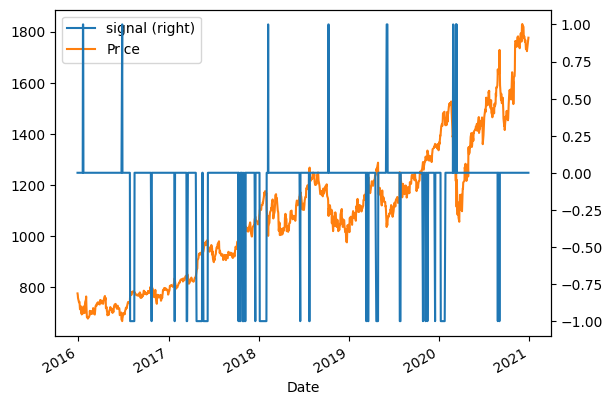

In [31]:
# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

## Create the strategy

In [38]:
bt_strategy = bt.Strategy('RSI_MeanReversion', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])



## Create the backtest and run it

In [33]:
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


## Plot the backtest result

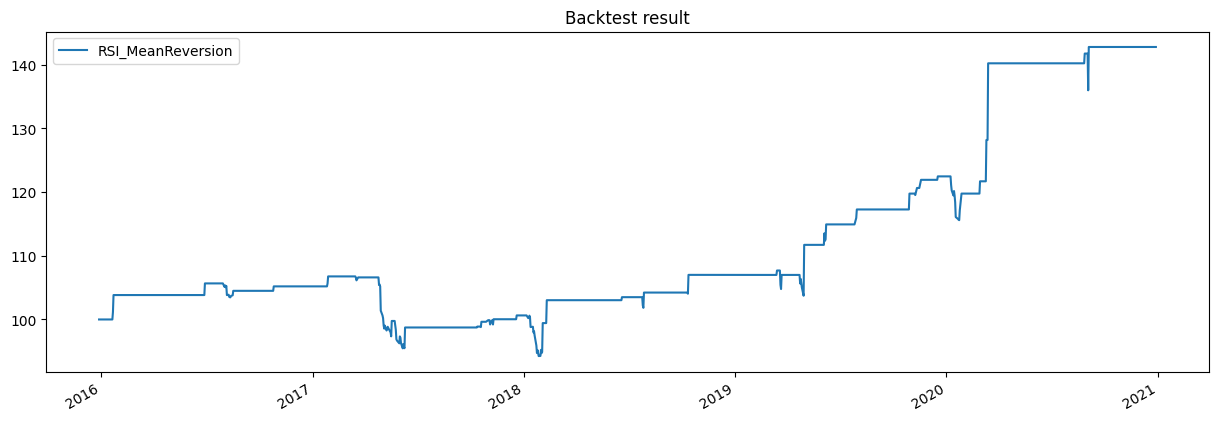

In [34]:
bt_result.plot(title='Backtest result')
plt.show()